In [20]:
%matplotlib inline

In [21]:
from datetime import datetime
import json
import matplotlib.pyplot as plt
from pywoudc import WoudcClient

In [22]:
# connect to WOUDC data service
client = WoudcClient()

# fetch totalozone, filter by temporal and platform_id, sort by datetime
# plot monthly o3 stddev
data = client.get_data('totalozone',
                       filters={'platform_id': '104'},
                       #variables=['instance_datetime', 'monthly_stddevo3'],
                       #bbox=[-180,-90,180,90],
                       sort_property='instance_datetime',
                       sort_descending=True)

# how many observations returned?
len(data['features'])

1554

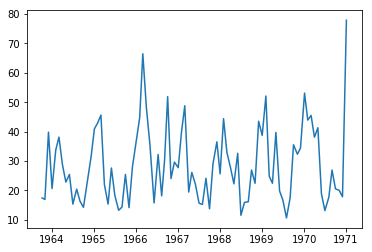

In [23]:
# setup graph axes
x_axis = [datetime.strptime(x['properties']['instance_datetime'], '%Y/%m/%d 00:00:00+00') for x in data['features']]
y_axis = [float(x['properties']['monthly_stddevo3']) for x in data['features']]

# render simple plot
plt.plot(x_axis, y_axis)